In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train / 255.0
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [2]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=5, verbose=0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


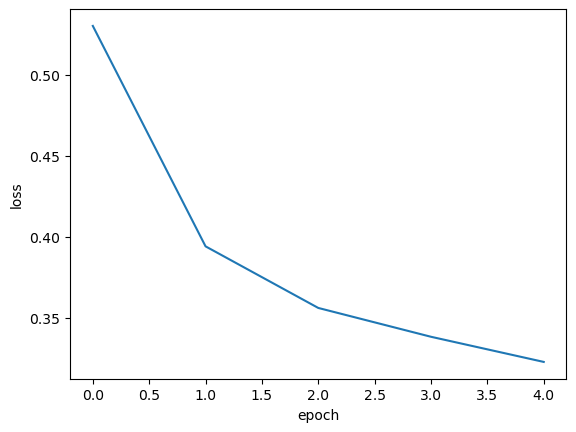

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

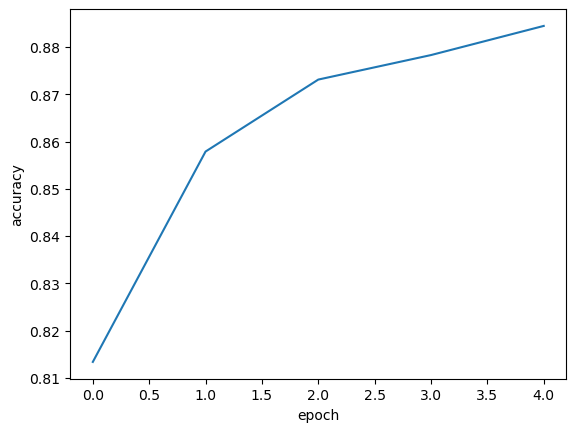

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

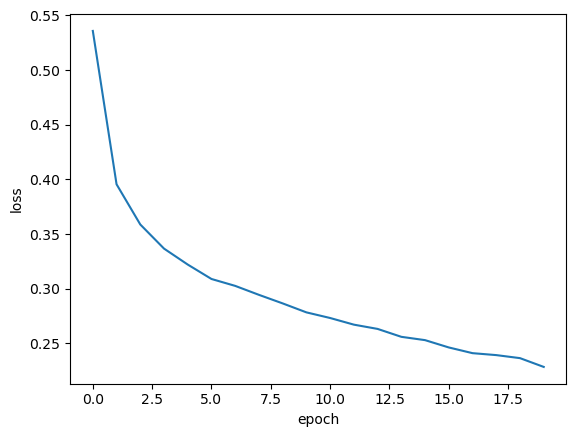

In [9]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() # 과대적합?

ML에서 정확도와 함께 Confusion Matrix를 봤던 것처럼,\
DL에서는 손실 함수를 주의깊게 보아야 함.

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))

In [11]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


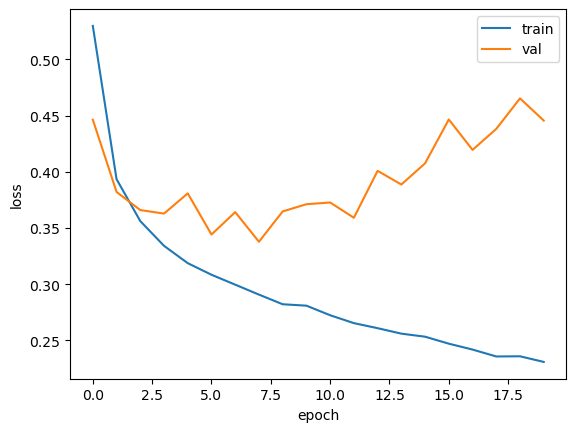

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 세트의 손실 함수는 안정적으로 감소하지만, 검증 세트는 오히려 증가함.\
즉, 5.0 이후로는 과대적합이 일어났다고 볼 수 있음.

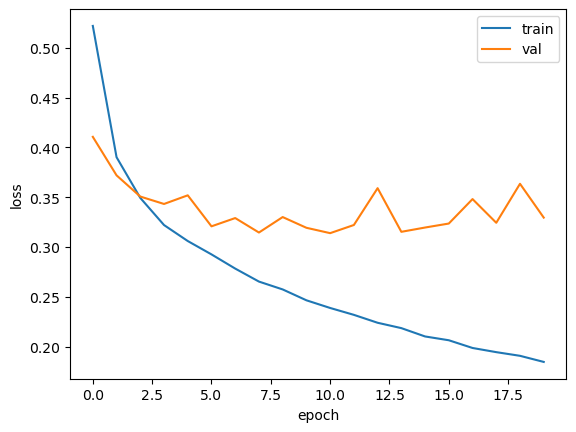

In [13]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() # 과대적합?

Adam은 적응적 학습률을 사용함. 확실히 과적합이 줄었음.\
학습률을 조정하면서 확인해볼까?

![Learning rate](https://i.stack.imgur.com/iMASu.jpg)

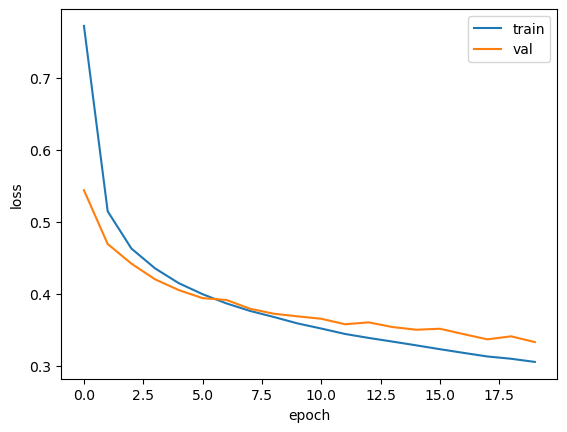

In [16]:
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [3]:
# 드롭아웃: 랜덤하게 뉴런을 끔. 마치 앙상블마냥..
model = model_fn(keras.layers.Dropout(0.3)) # 30%
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


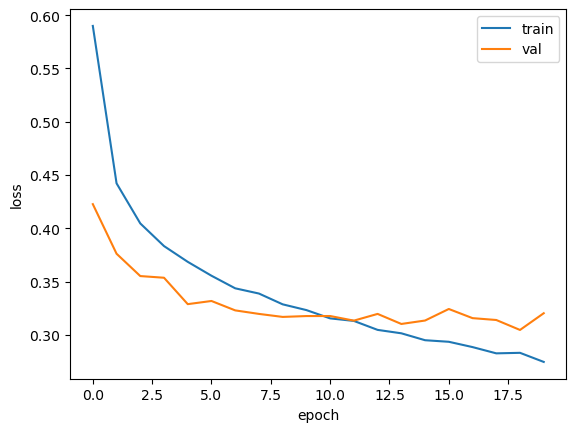

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

위 그래프랑 비교해보면 y축 스케일이 다름. 이 모델이 좀 더 좋은듯?

In [6]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs=12, verbose=0, validation_data=(X_val_scaled, y_val))

In [7]:
# 파라미터 저장
model.save_weights('model-weights.h5')

In [8]:
# 구조와 파라미터 함께 저장
model.save('model-whole.h5')

In [9]:
!dir

 Volume in drive D is NVMe
 Volume Serial Number is 60B6-0588

 Directory of d:\Programming\Python\MachineAndDeepLearning\Chapter7

01/19/2024  01:32 PM    <DIR>          .
01/19/2024  02:23 AM    <DIR>          ..
01/19/2024  02:06 AM            49,211 01-artificial-network.ipynb
01/19/2024  02:24 AM            12,021 02-deep-network.ipynb
01/19/2024  01:32 PM           224,040 03-models.ipynb
01/19/2024  01:32 PM           333,320 model-weights.h5
01/19/2024  01:32 PM           982,480 model-whole.h5
               5 File(s)      1,601,072 bytes
               2 Dir(s)  260,183,089,152 bytes free


In [10]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [11]:
import numpy as np

val_labels = np.argmax(model.predict(X_val_scaled), axis=-1)
np.mean(val_labels == y_val)

375/375 [==============================] - 0s 614us/step


0.88725

In [12]:
# 파라미터, 구조, 옵티마이저를 모두 복원
model = keras.models.load_model('model-whole.h5')
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 0s 702us/step - loss: 0.3150 - accuracy: 0.8873


[0.31496474146842957, 0.8872500061988831]

In [13]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val),
          callbacks=[checkpoint_cb])

In [14]:
model = keras.models.load_model('best-model.h5')
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 0s 712us/step - loss: 0.3124 - accuracy: 0.8873


[0.3123767077922821, 0.887333333492279]

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
# 조기종료: 검증세트 점수가 상상하면 끝내기
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
model.fit(X_train_scaled, y_train, epochs=20, verbose=0, validation_data=(X_val_scaled, y_val),
          callbacks=[checkpoint_cb, early_stopping_cb])
print(early_stopping_cb.stopped_epoch) # 0부터 카운트. 7번째 에포크에서 중단됨.

6


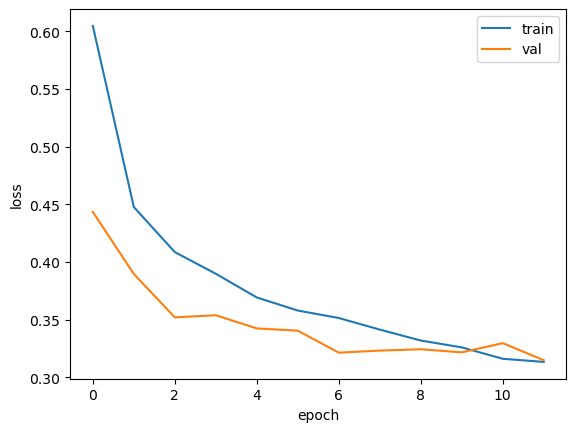

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

응...? 근데 이거 과소적합 아닌가